In [1]:
# %matplotlib qt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import time
import copy
import numpy as np
from skimage.filters import gaussian_filter
import cv2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

from tifffile import imread, imsave
import cPickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

Populating the interactive namespace from numpy and matplotlib


# Load time-lapse data...

In [5]:
folder = '/Users/jug/Repositories/GIT/BobSeg/AmyMaddox/'
#folder = '/Users/maddox/Jug/Data/'

filename = folder + 'Reslice_of_298_crop.tif'
#filename = folder + 'Reslice_of_nd324_crop_16b.tif'

stack = imread(filename)
print 'Stack shape:',stack.shape

sigma = [0.,3.,3.]
stack_smooth = gaussian_filter(stack,sigma)

Stack shape: (76, 395, 490)


/usr/local/lib/python2.7/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


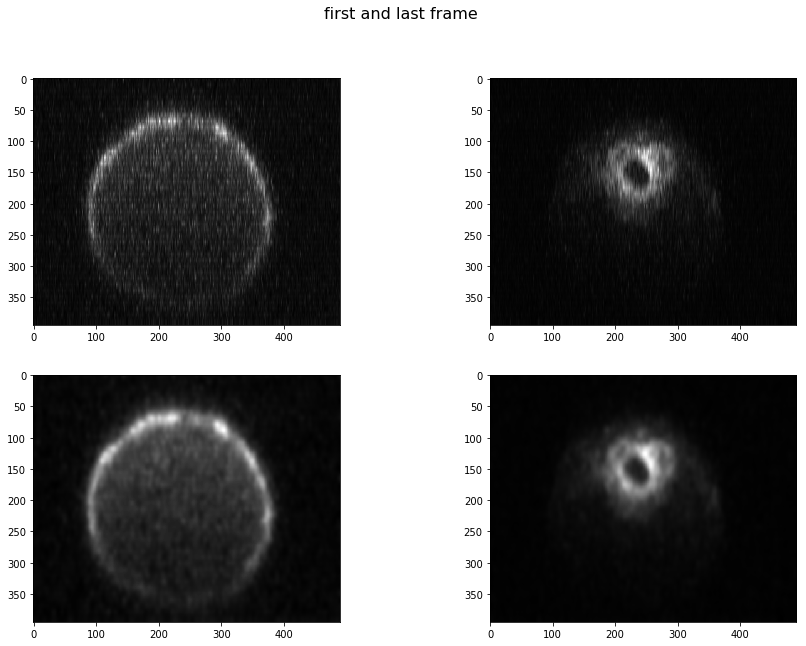

In [6]:
pylab.rcParams['figure.figsize'] = (15, 10)

fig = plt.figure()
fig.suptitle('first and last frame', fontsize=16)
ax = fig.add_subplot(221)
ax.imshow(stack[0], plt.get_cmap('gray'))
ax = fig.add_subplot(222)
ax.imshow(stack[-1], plt.get_cmap('gray'))
ax = fig.add_subplot(223)
ax.imshow(stack_smooth[0], plt.get_cmap('gray'))
ax = fig.add_subplot(224)
ax.imshow(stack_smooth[-1], plt.get_cmap('gray'))

In [19]:
max_rs = (stack[0].shape[1] / 2.5,
          stack[0].shape[1] / 3)

min_rs = (5,5)
print min_rs, max_rs

(5, 5) (196.0, 196.0)


# Adding ring

In [20]:
data = Data3d( stack_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=150,max_delta_k=1)
objects = []

In [21]:
ring = data.init_object("ring")
objects.append(ring)

In [22]:
cx = stack.shape[2] / 2
cy = stack.shape[1] / 2
data.add_object_at( ring, min_rs, max_rs, frame=0, seed=(cx,cy), segment_it=True )
data.track(ring, seed_frame=0, target_frames=range(0,len(data.images)), recenter_iterations=2)

Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  0.283304529915
      Nodes in/out:  7643 3157
      Area:  59980.0
Added appearance for "ring" in frame 0 with seed coordinates [ 245.  197.]
      Optimum energy:  0.283304529915
      Nodes in/out:  7643 3157
      Area:  59980.0
    Updated center to [237 202]
    Updated center to [237 202]
Added appearance for "ring" in frame 1 with seed coordinates [ 237.  202.]
      Optimum energy:  0.264130867061
      Nodes in/out:  7773 3027
      Area:  61734.0
    Updated center to [234 207]
    Updated center to [234 207]
Added appearance for "ring" in frame 2 with seed coordinates [ 234.  207.]
      Optimum energy:  0.228822694024
      Nodes in/out:  7834 2966
      Area:  62529.5
    Updated center to [233 210]
    Updated center to [233 210]
Added appearance for "ring" in frame 3 with seed coordinates [ 233.  210.]
      Optimum energy:  0.215221796485
      Nodes in/out:  7873 2927
    

Added appearance for "ring" in frame 36 with seed coordinates [ 253.  202.]
      Optimum energy:  0.169020004919
      Nodes in/out:  6105 4695
      Area:  38295.0
    Updated center to [252 199]
    Updated center to [252 199]
Added appearance for "ring" in frame 37 with seed coordinates [ 252.  199.]
      Optimum energy:  0.158615729478
      Nodes in/out:  5971 4829
      Area:  36690.0
    Updated center to [251 195]
    Updated center to [251 195]
Added appearance for "ring" in frame 38 with seed coordinates [ 251.  195.]
      Optimum energy:  0.169911625183
      Nodes in/out:  5900 4900
      Area:  35811.0
    Updated center to [250 192]
    Updated center to [250 192]
Added appearance for "ring" in frame 39 with seed coordinates [ 250.  192.]
      Optimum energy:  0.148365117609
      Nodes in/out:  5831 4969
      Area:  35031.0
    Updated center to [250 189]
    Updated center to [250 189]
Added appearance for "ring" in frame 40 with seed coordinates [ 250.  189.]
    

Added appearance for "ring" in frame 72 with seed coordinates [ 243.  143.]
      Optimum energy:  0.150520632118
      Nodes in/out:  1792 9008
      Area:  3776.5
    Updated center to [239 144]
    Updated center to [239 144]
Added appearance for "ring" in frame 73 with seed coordinates [ 239.  144.]
      Optimum energy:  0.170873487989
      Nodes in/out:  1616 9184
      Area:  3107.0
    Updated center to [236 145]
    Updated center to [236 145]
Added appearance for "ring" in frame 74 with seed coordinates [ 236.  145.]
      Optimum energy:  0.194048633825
      Nodes in/out:  1491 9309
      Area:  2697.5
    Updated center to [234 147]
    Updated center to [234 147]
Added appearance for "ring" in frame 75 with seed coordinates [ 234.  147.]
      Optimum energy:  0.179947973902
      Nodes in/out:  1394 9406
      Area:  2385.0
    Updated center to [233 149]
    Updated center to [233 149]


In [23]:
data.segment2dt( ring, max_radial_delta=3 )

Results for frame 0:
      Optimum energy:  12.7305755583
      Area:  61866.0
Results for frame 1:
      Optimum energy:  12.7305755583
      Area:  62722.0
Results for frame 2:
      Optimum energy:  12.7305755583
      Area:  62902.5
Results for frame 3:
      Optimum energy:  12.7305755583
      Area:  63170.0
Results for frame 4:
      Optimum energy:  12.7305755583
      Area:  62893.0
Results for frame 5:
      Optimum energy:  12.7305755583
      Area:  62524.5
Results for frame 6:
      Optimum energy:  12.7305755583
      Area:  62364.5
Results for frame 7:
      Optimum energy:  12.7305755583
      Area:  62680.0
Results for frame 8:
      Optimum energy:  12.7305755583
      Area:  62242.0
Results for frame 9:
      Optimum energy:  12.7305755583
      Area:  62045.0
Results for frame 10:
      Optimum energy:  12.7305755583
      Area:  61266.0
Results for frame 11:
      Optimum energy:  12.7305755583
      Area:  61345.0
Results for frame 12:
      Optimum energy:  12.73

# Visualisation stuff 

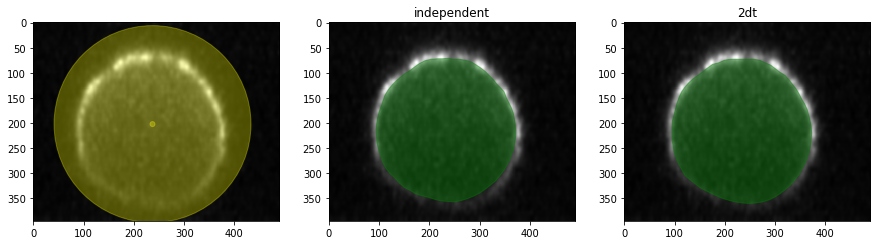

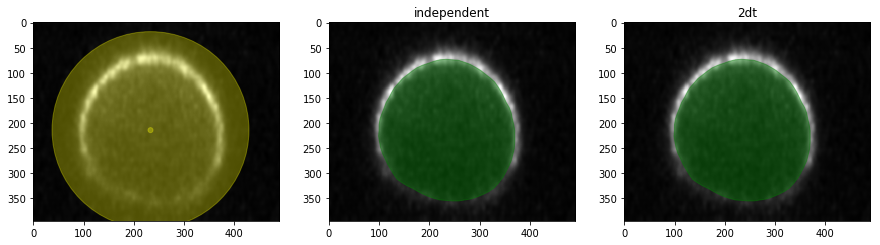

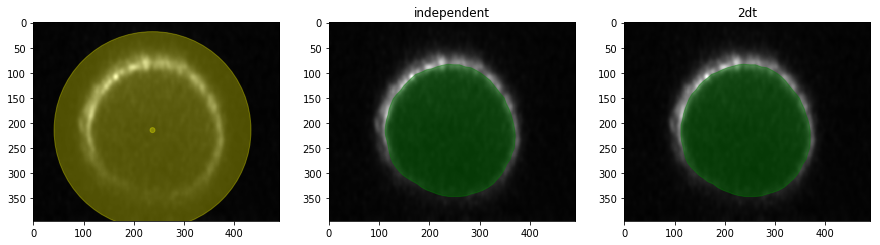

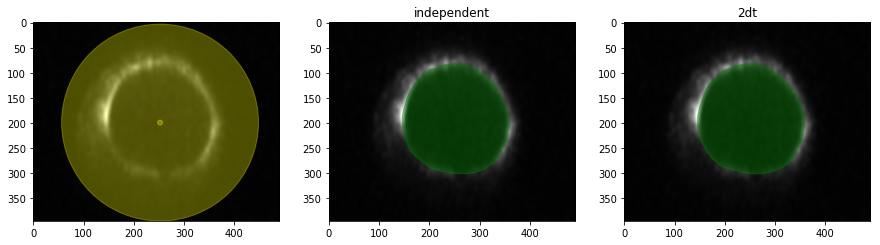

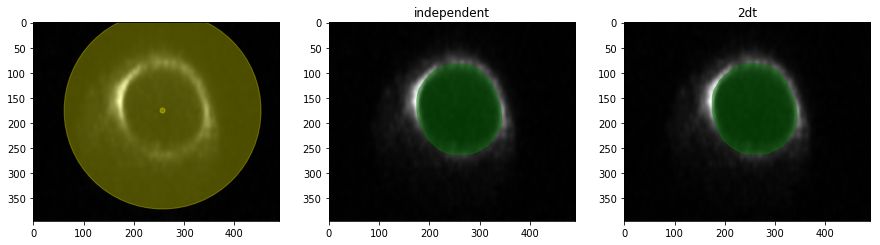

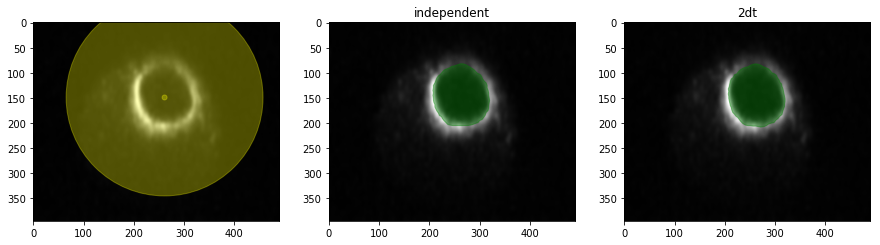

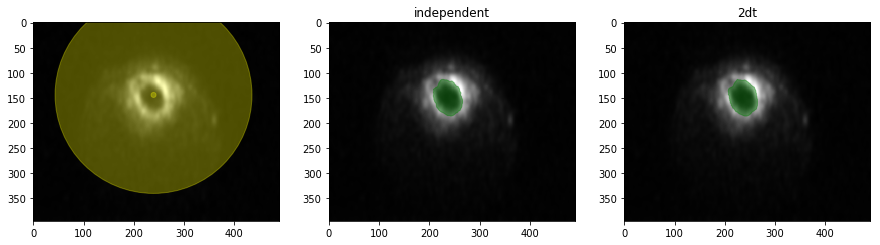

In [24]:
pylab.rcParams['figure.figsize'] = (15, 7)
for frame in range(1,len(data.images),len(data.images)/6):
    fig = plt.figure()
    ax = plt.subplot(131)
    data.plot_minmax( frame, ax )
    ax = plt.subplot(132)
    ax.set_title('independent')
    data.plot_result( frame, ax )    
    ax = plt.subplot(133)
    ax.set_title('2dt')
    data.plot_2dt_result( frame, ax )

In [25]:
spiral = np.zeros( (len(data.object_seedpoints[0]), 3) )
xs = np.zeros( len(data.object_seedpoints[0]) )
ys = np.zeros( len(data.object_seedpoints[0]) )

In [26]:
# read the center seeds he found for frames
for i in range(len(data.object_seedpoints[0])):
    xs[i] = data.object_seedpoints[0][i][0]    
    ys[i] = data.object_seedpoints[0][i][1]

In [27]:
# get k values over time
kovert = data.get_k_over_time(ring)[:,:60]
print kovert.shape

(72, 60)


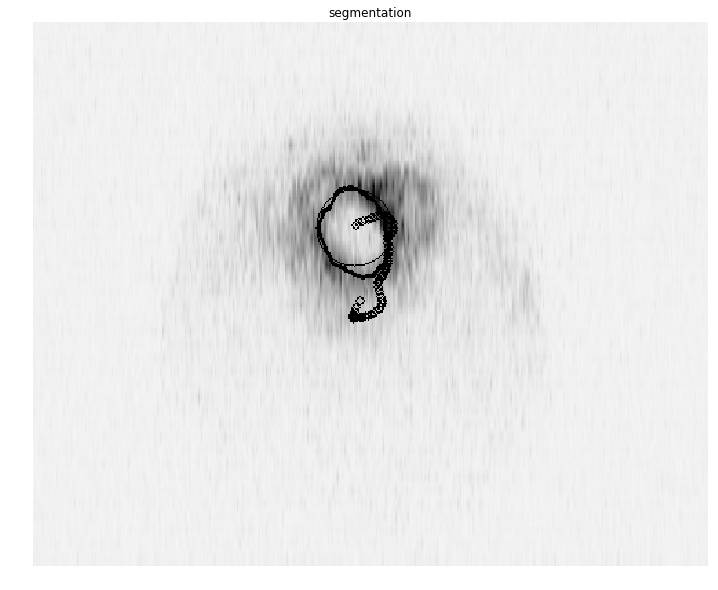

In [145]:
from moviemaker2d import MovieMaker2d
mm = MovieMaker2d(False)
frames, centers, all_polygones, radii = mm.draw_segmentation(data, stack, folder=None, inline=True)

In [51]:
for f in range(len(frames)):
    imsave(folder+'movie_export/frame%02d.tif'%(f), frames[f])

# Measuring intensities

In [92]:
delta_radius = 15 #this defines the width of the ring within to measure

In [93]:
def measure_intensities( stack, centers, polygone_points, radii):
    return 5

In [94]:
measure_intensities( stack, centers[0], all_polygones[0], radii )

5

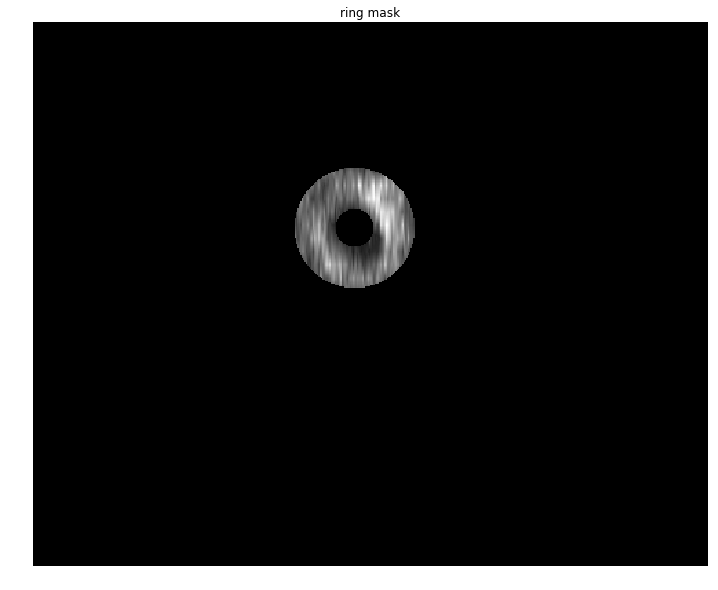

In [149]:
from IPython.display import clear_output
fig = plt.figure()
summed_intensities = []
for f in range(len(frames)):
    size_x = shape(stack[f])[1]
    size_y = shape(stack[f])[0]

    cx, cy = centers[f]
    r_inner = radii[f]-delta_radius
    r_outer = radii[f]+delta_radius

    y,x = np.ogrid[-cy:size_y-cy, -cx:size_x-cx]
    mask1 = x*x + y*y <= r_outer*r_outer 
    mask2 = x*x + y*y >= r_inner*r_inner
    mask = mask1 & mask2
    
    summed_intensities.append(sum(stack[f]*mask))

    pylab.axis('off')
    pylab.title("ring mask")
    pylab.imshow(stack[f]*mask, plt.get_cmap('gray'))
    pylab.show()
    clear_output(wait=True)

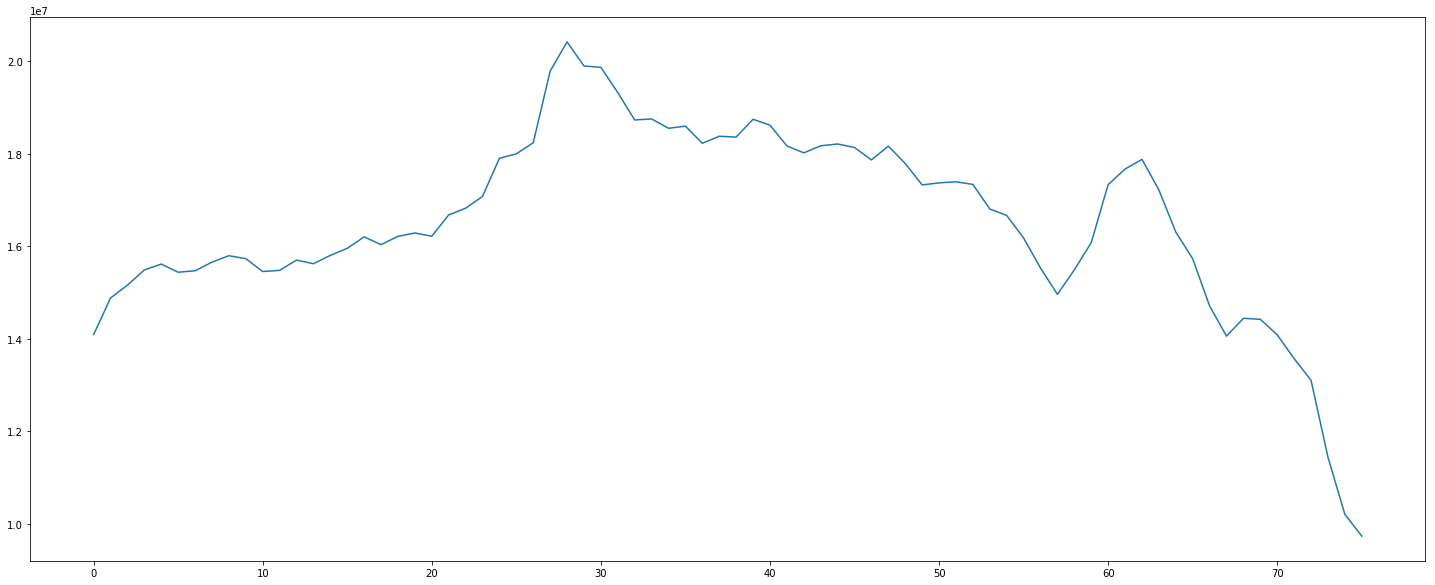

In [151]:
plot(summed_intensities)